In [23]:
#Import modules and load using pandas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as plt
%matplotlib inline

In [3]:
df = pd.read_csv("BankLoanApproval.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,IA35XVH6ZO,28,140466,163781,652,94,2,9.08,48,0.23,High School,Unemployed,Married,No,No,Education,No,0
1,Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
2,RM6QSRHIYP,41,23265,63527,829,87,4,9.73,60,0.45,Master's,Full-time,Divorced,Yes,No,Auto,Yes,0
3,GX5YQOGROM,53,117550,95744,395,112,4,3.58,24,0.73,High School,Unemployed,Single,No,No,Auto,Yes,0
4,X0BVPZLDC0,57,139699,88143,635,112,4,5.63,48,0.20,Master's,Part-time,Divorced,No,No,Home,No,0


In [5]:
df.describe()
#no missing value

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000
mean,43.498059,82500.225585,127579.236559,574.266125,59.542516,2.501036,13.492848,36.025896,0.500222,0.116118
std,14.990304,38963.150663,70841.308245,158.904496,34.643129,1.117021,6.636456,16.969297,0.230917,0.320367
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48826.000000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82467.000000,127557.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188986.500000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [65]:
df["Education"].value_counts()

Education
1    64360
0    63895
2    63538
3    63534
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255327 entries, 0 to 255326
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255327 non-null  object 
 1   Age             255327 non-null  int64  
 2   Income          255327 non-null  int64  
 3   LoanAmount      255327 non-null  int64  
 4   CreditScore     255327 non-null  int64  
 5   MonthsEmployed  255327 non-null  int64  
 6   NumCreditLines  255327 non-null  int64  
 7   InterestRate    255327 non-null  float64
 8   LoanTerm        255327 non-null  int64  
 9   DTIRatio        255327 non-null  float64
 10  Education       255327 non-null  object 
 11  EmploymentType  255327 non-null  object 
 12  MaritalStatus   255327 non-null  object 
 13  HasMortgage     255327 non-null  object 
 14  HasDependents   255327 non-null  object 
 15  LoanPurpose     255327 non-null  object 
 16  HasCoSigner     255327 non-null  object 
 17  Default   

In [8]:
#Preprocesing 
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [17]:
print(df.duplicated().any())

False


In [64]:
df.shape

(255327, 10)

<Axes: xlabel='count', ylabel='Education'>

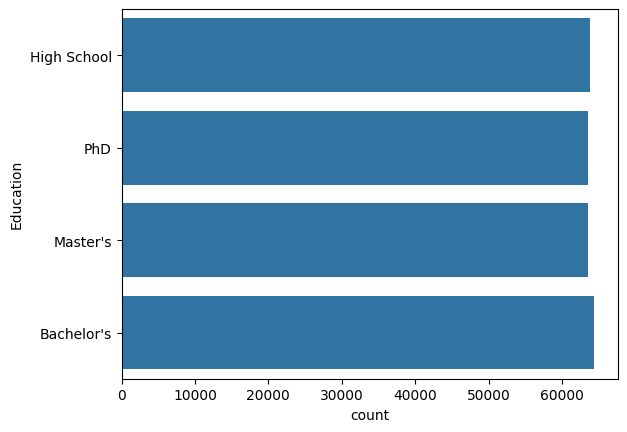

In [9]:
#EDA on categorical variables
sns.countplot(df['Education'])

<Axes: xlabel='count', ylabel='EmploymentType'>

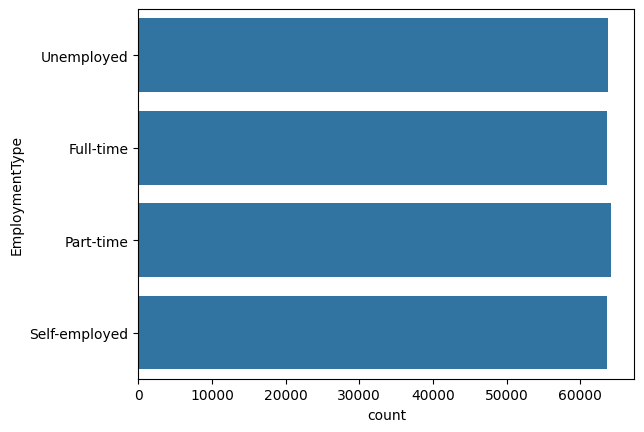

In [10]:
sns.countplot(df['EmploymentType'])

<Axes: xlabel='count', ylabel='MaritalStatus'>

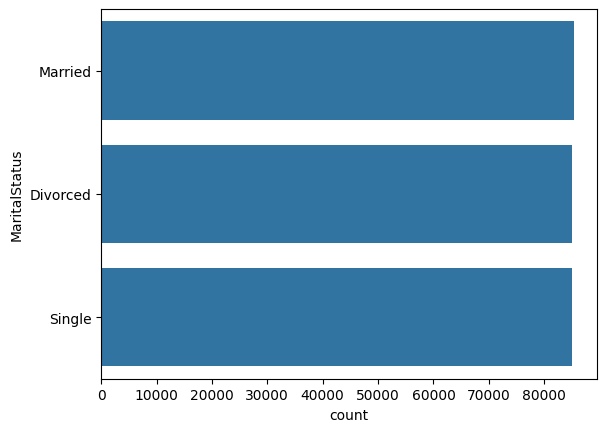

In [11]:
sns.countplot(df['MaritalStatus'])

<Axes: xlabel='count', ylabel='HasMortgage'>

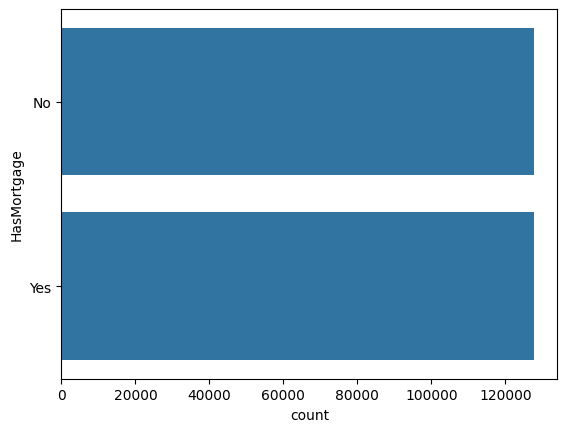

In [12]:
sns.countplot(df['HasMortgage'])

<Axes: xlabel='count', ylabel='HasDependents'>

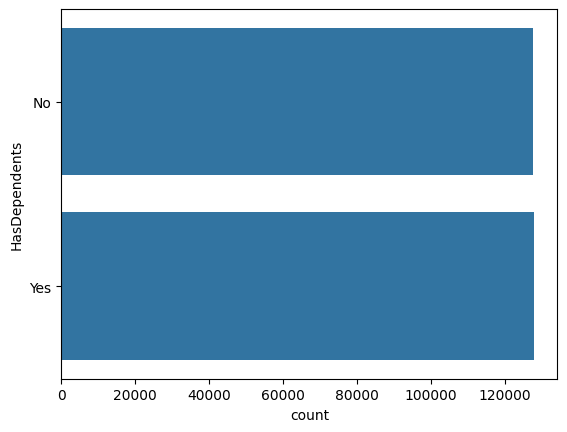

In [13]:
sns.countplot(df['HasDependents'])

<Axes: xlabel='count', ylabel='LoanPurpose'>

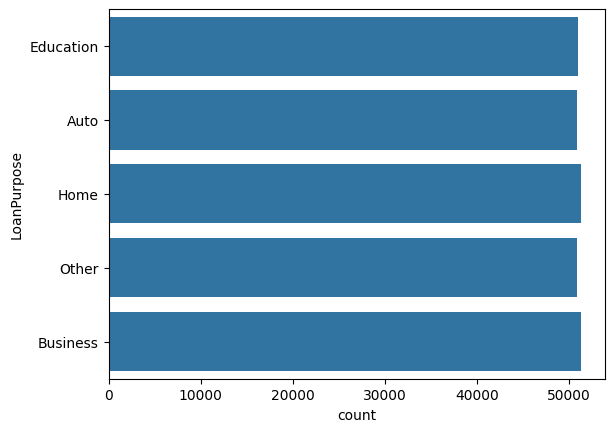

In [14]:
sns.countplot(df['LoanPurpose'])

<Axes: xlabel='count', ylabel='HasCoSigner'>

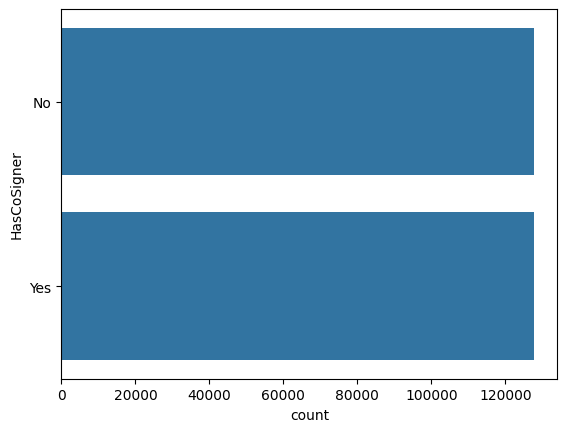

In [4]:
sns.countplot(df['HasCoSigner'])

C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\1663157343.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

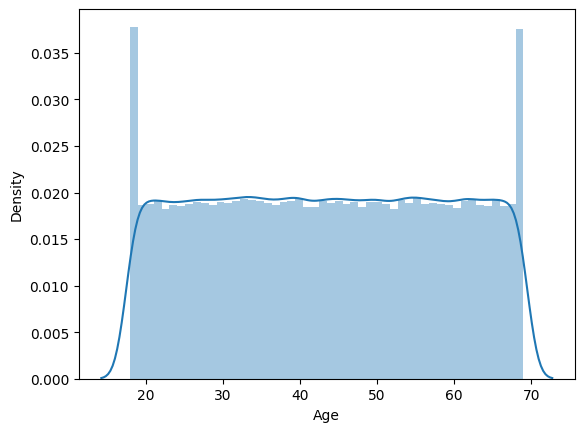

In [5]:
#EDA on numerical variables
sns.distplot(df['Age'])

C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\1426022472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

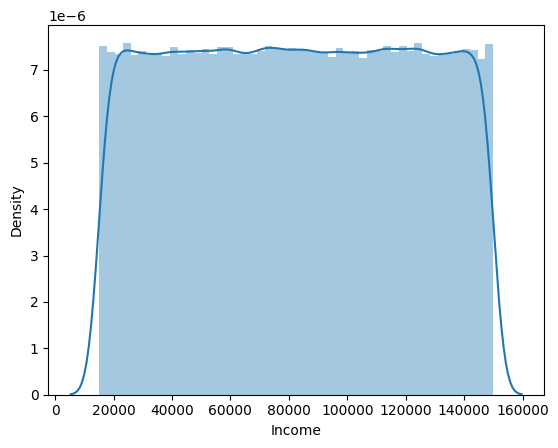

In [6]:
sns.distplot(df['Income'])

C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\413488336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

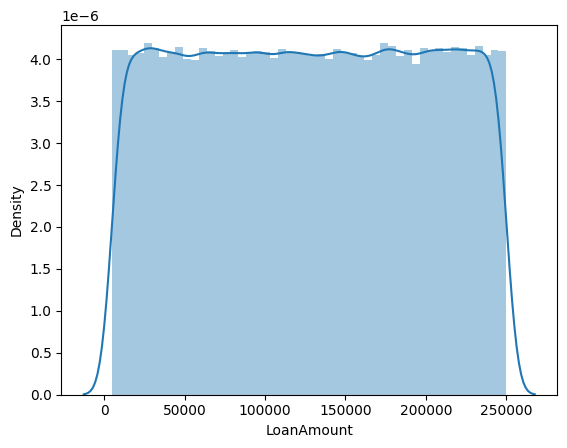

In [7]:
sns.distplot(df['LoanAmount'])

C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\3364146939.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CreditScore'])


<Axes: xlabel='CreditScore', ylabel='Density'>

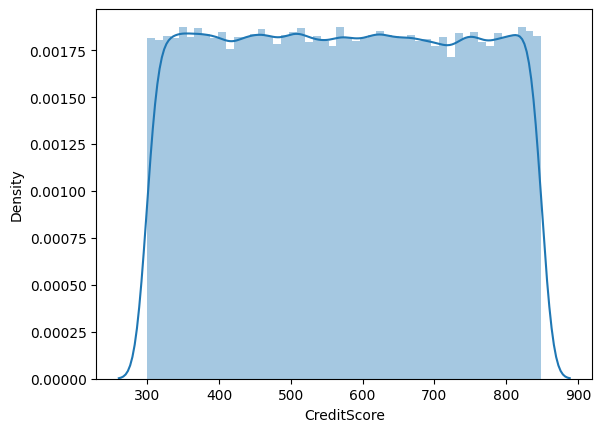

In [8]:
sns.distplot(df['CreditScore'])

C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\289069781.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthsEmployed'])


<Axes: xlabel='MonthsEmployed', ylabel='Density'>

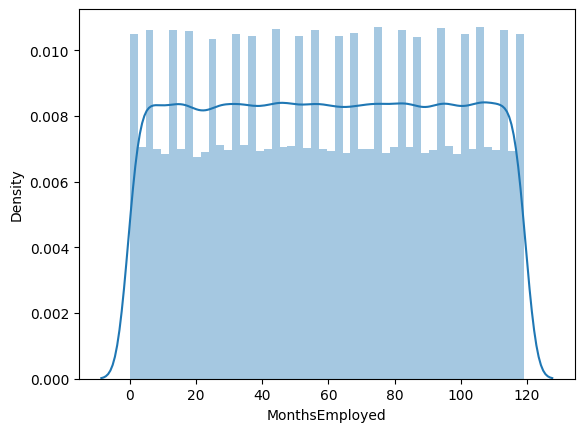

In [9]:
sns.distplot(df['MonthsEmployed'])

C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\4158958955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumCreditLines'])


<Axes: xlabel='NumCreditLines', ylabel='Density'>

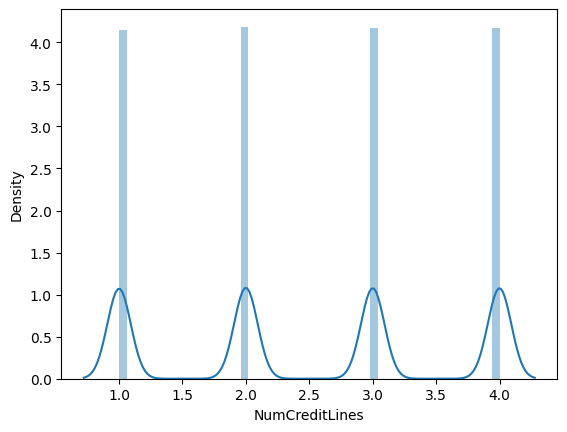

In [10]:
sns.distplot(df['NumCreditLines'])

C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\2702472509.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['InterestRate'])


<Axes: xlabel='InterestRate', ylabel='Density'>

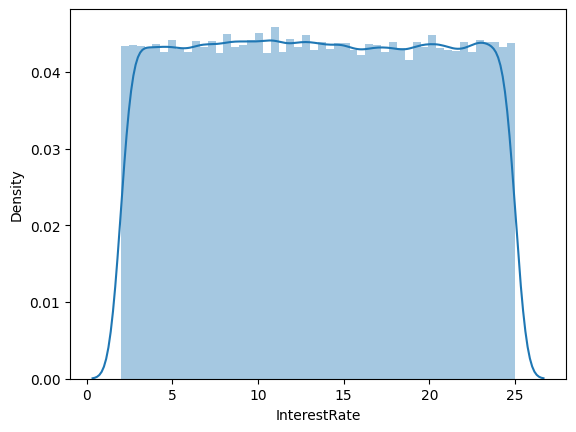

In [11]:

sns.distplot(df['InterestRate'])

C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\478172532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanTerm'])


<Axes: xlabel='LoanTerm', ylabel='Density'>

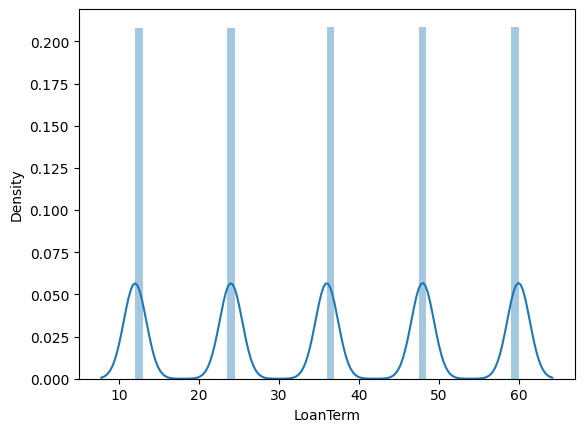

In [12]:
sns.distplot(df['LoanTerm'])

C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\200273950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DTIRatio'])


<Axes: xlabel='DTIRatio', ylabel='Density'>

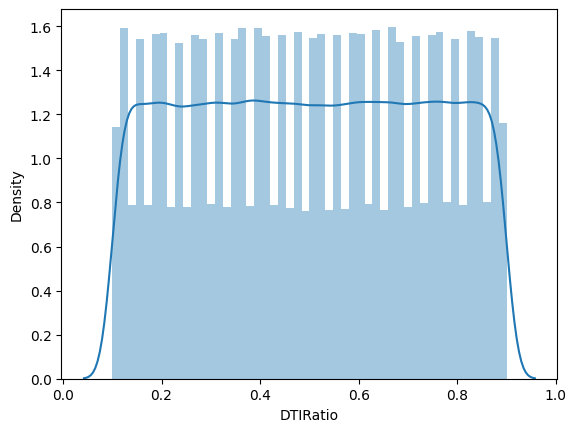

In [13]:
sns.distplot(df['DTIRatio'])

In [21]:
# Mapping the categorical to numerical 
# Selecting variables 
# Dropped the LoanID
# Define the mappings
education_mapping = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
employment_mapping = {'Unemployed': 0, 'Part-time': 1, 'Full-time': 2, 'Self-employed': 3}
marital_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}
mortgage_mapping = {'Yes': 1, 'No': 0}

# Select the specified columns
selected_columns = df[["Age", "Income", "LoanAmount", "CreditScore", "DTIRatio", 
                       "Education", "EmploymentType", "MaritalStatus", 
                       "HasMortgage", "Default"]]

# Map the education column
selected_columns['Education'] = selected_columns['Education'].map(education_mapping)

# Map the employment column
selected_columns['EmploymentType'] = selected_columns['EmploymentType'].map(employment_mapping)

# Map the marital status column
selected_columns['MaritalStatus'] = selected_columns['MaritalStatus'].map(marital_mapping)

# Map the HasMortgage column
selected_columns['HasMortgage'] = selected_columns['HasMortgage'].map(mortgage_mapping)

df =selected_columns
df.head()

C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\4244984590.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Education'] = selected_columns['Education'].map(education_mapping)
C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\4244984590.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['EmploymentType'] = selected_columns['EmploymentType'].map(employment_mapping)
C:\Users\cheng\AppData\Local\Temp\ipykernel_22880\4244984590.py:20: SettingWithCopyWarning: 
A value is

,Age,Income,LoanAmount,CreditScore,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,Default
0,28,140466,163781,652,0.23,0,0,1,0,0
1,28,149227,139759,375,0.80,3,2,2,0,1
2,41,23265,63527,829,0.45,2,2,2,1,0
3,53,117550,95744,395,0.73,0,0,0,0,0
4,57,139699,88143,635,0.20,2,1,2,0,0


<Axes: >

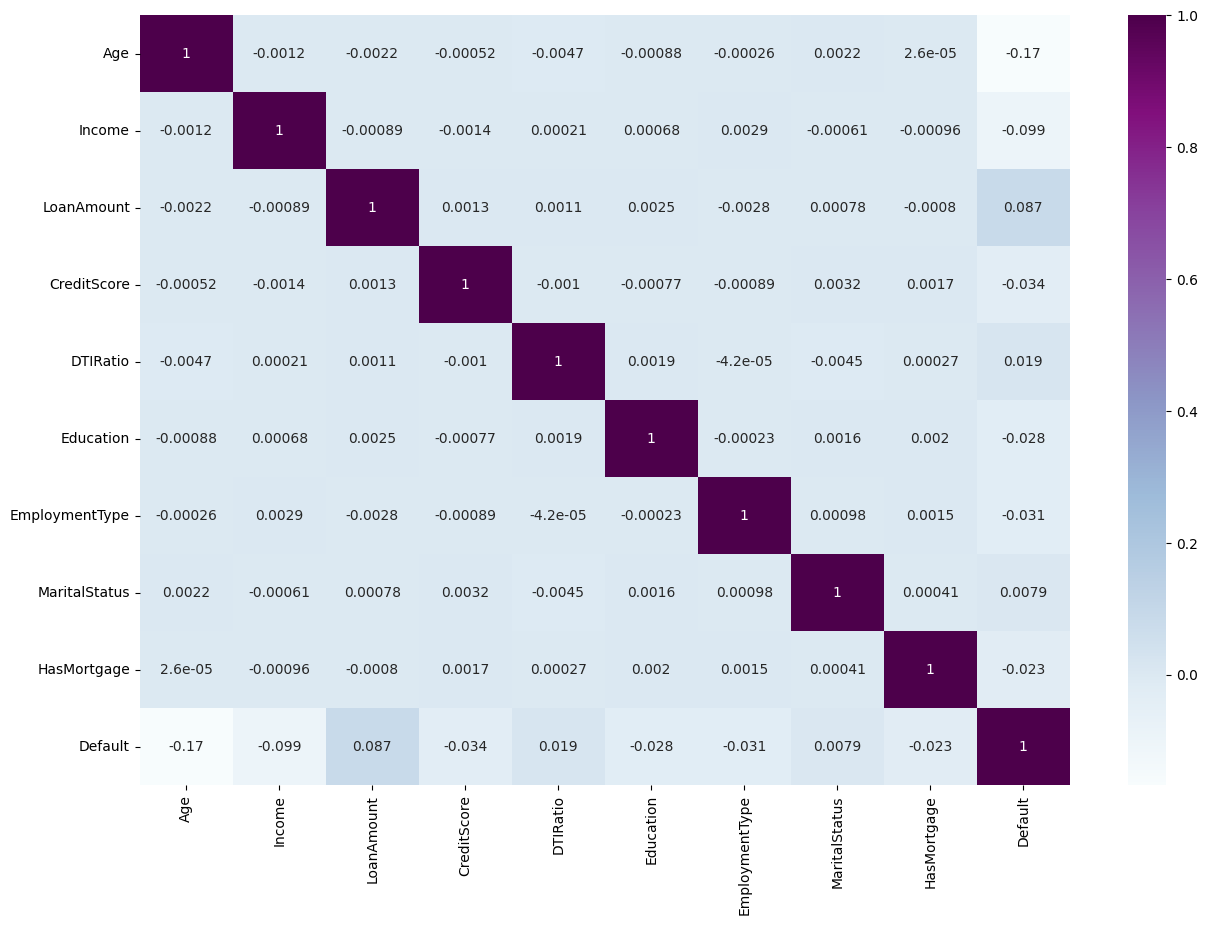

In [30]:
#Correlation Matrix
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot =True, cmap="BuPu")

In [31]:
#Train test Split
#specify input and output attributes
X = df.drop(columns=['Default'],axis=1)  # Features
y = df['Default']  # Target variable

In [32]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.3,random_state = 42)

In [45]:
#model training
from sklearn.model_selection import cross_val_score
def classify(model , x , y):
    x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.2,random_state = 42)
    model.fit(x_train,y_train)
    print("Accuracy is",model.score(x_test,y_test)*100)

    #cross validation -for better validation of model
    score = cross_val_score(model,x,y,cv=5)
    print("Cross validation is",np.mean(score)*100)


In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

c:\Programming Languages\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is 88.2191673520542


c:\Programming Languages\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Programming Languages\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross validation is 88.3886153874778


c:\Programming Languages\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
classify(model1,X,y)

Accuracy is 79.49124662201856
Cross validation is 79.49962134426121


In [62]:
model1.score(x_train,y_train)

1.0

In [63]:
model1.score(x_test,y_test)

0.8632749774801237

In [47]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model =RandomForestClassifier()
classify(model,X,y)

Accuracy is 88.3170798574394
Cross validation is 88.42464760001772


In [48]:
model = ExtraTreesClassifier()
classify(model,X,y)


Accuracy is 88.2211256021619
Cross validation is 88.33143386715963


In [60]:
#HyperParameter tuning
# original is  n_estimators= 25 , min_samples_split=25, max_depth=7, max_features=1
model =RandomForestClassifier(n_estimators= 50 , min_samples_split=50, max_depth=10, max_features=1)
classify(model,X,y)
#hyperParameter tuning 

Accuracy is 88.22308385226961
Cross validation is 88.39292358013033


In [51]:
#Confusion Matrix
model  = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

<Axes: >

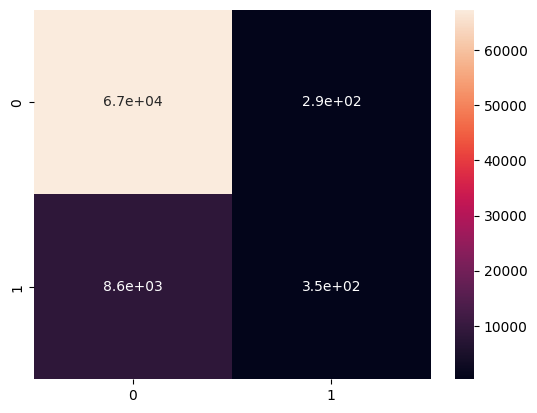

In [54]:
sns.heatmap(cm, annot =True)